In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 328 runs
Auto parsing failed with: test-cmd_200202-182019
Auto parsing failed with: test-cmd_200202-182140
Auto parsing failed with: test-cmd_200202-182804
Auto parsing failed with: test-cmd_200202-183508
Auto parsing failed with: test-cmd_200202-192959
Auto parsing failed with: test-cmd_200202-194400
Auto parsing failed with: test-cmd_200202-200904
Auto parsing failed with: test-cmd_200202-201315
Auto parsing failed with: test-cmd_200202-203736
Auto parsing failed with: test-cmd_200203-120137
Auto parsing failed with: test-cmd_200203-121144
Auto parsing failed with: test-cmd_200203-121301
Auto parsing failed with: test-cmd_200203-204121
Auto parsing failed with: test-pycharm_200202-162713
Auto parsing failed with: test-pycharm_200202-162914
Auto parsing failed with: test-pycharm_200202-164740
Auto parsing failed with: test-pycharm_200202-170552
Auto parsing failed with: test-pycharm_200202-170706
Auto parsing failed with: test-pycharm_200202-170949
Auto parsing failed with: test

In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')


M.filter_jobs(30)
# M.filter_models('ae')
# M.filter_datasets('3dshapes')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history or 'n/adain-large' in r.config.info.history)
# M.filter_models('wgan')

# M.filter_datasets('nocap')
# M.filter_datasets('mpi3d')
# M.filter_datasets('3dshapes')

M.prep_info()
# M.filter_min(ckpt=30)

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


Selecting checkpoint: last
Loaded configs
  0) 3dshapes-ae_0030-6046949-00_200131-125923
  1) 3dshapes-dae_0030-6046949-02_200131-125904


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


In [6]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last
Loaded configs


In [7]:
M.show('ckpt')

  0) 3dshapes-ae_0030-6046949-00_200131-125923
	Checkpoint: 30 (approx 150000 steps)

  1) 3dshapes-dae_0030-6046949-02_200131-125904
	Checkpoint: 30 (approx 150000 steps)



In [8]:
M.clear_run_cache()

In [9]:
# M[0].ckpt_path

In [10]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# tmpl= 'unbuffer python hybrid.py n/t/nocap2cap --load {}'#' --model.lr 5e-4'
tmpl= 'unbuffer python hybrid.py --legacy 0 --resume {}'

# print('\n'.join(tmpl.format(n) for n in M.through().name))

In [11]:
run = M[0]
run.name

'3dshapes-ae_0030-6046949-00_200131-125923'

In [11]:
M.clear_run_cache()

In [12]:
S = run.reset()

In [13]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [58]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
crop_size: 128 (by default)
crop_loc: center (by default)
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
label_type: None (by default)
train: True
resize: None
din: (3, 128, 128)
dout: (3, 128, 128) (by default)
Model-type: fwpp
latent_disc: None (by default)
reg_prior: 0.01
ldisc_steps: 1 (by default)
ldisc_gp: 10.0 (by default)
Creating encoder (type=double-enc)
  in_shape --> din: (3, 128, 128) (in parent)
  channels: [64, 64, 128, 128, 128, 256] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 32 (in parent)
  Creat

In [59]:
run.run(pbar=tqdm)

Using 1000 samples



Storing 16277 latent vectors


In [60]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/celeba-fwae_0055-6050351-06_200201-215029/checkpoint_40.pth.tar'

In [61]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


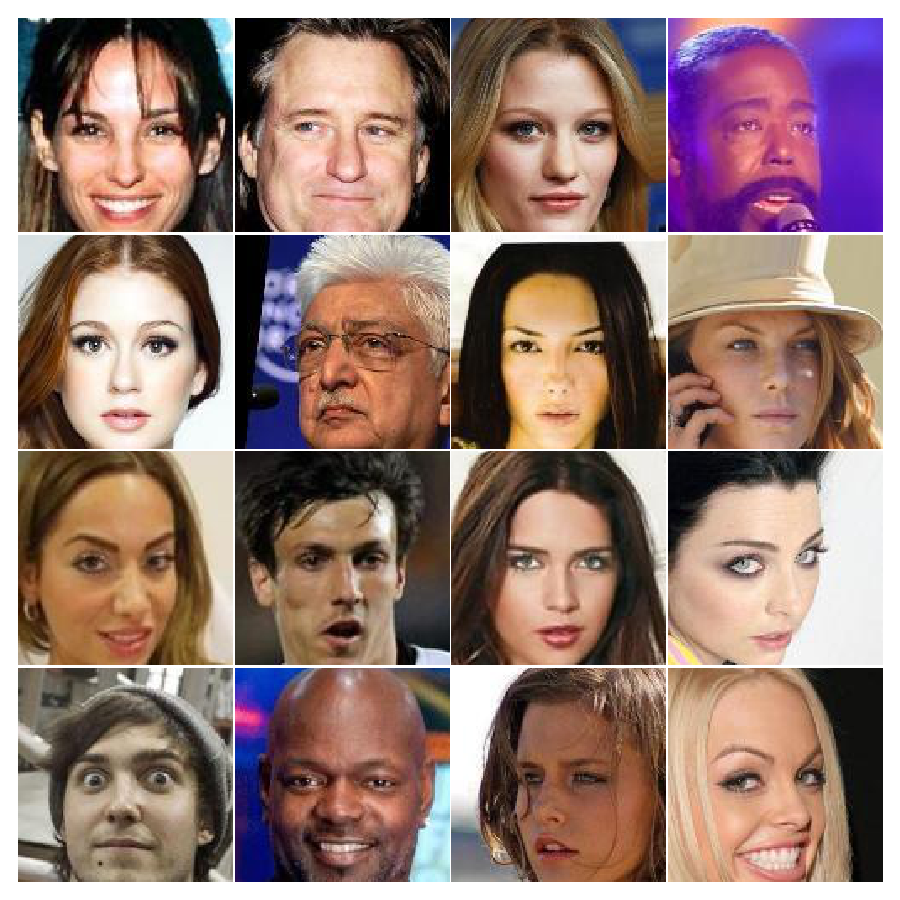

In [70]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


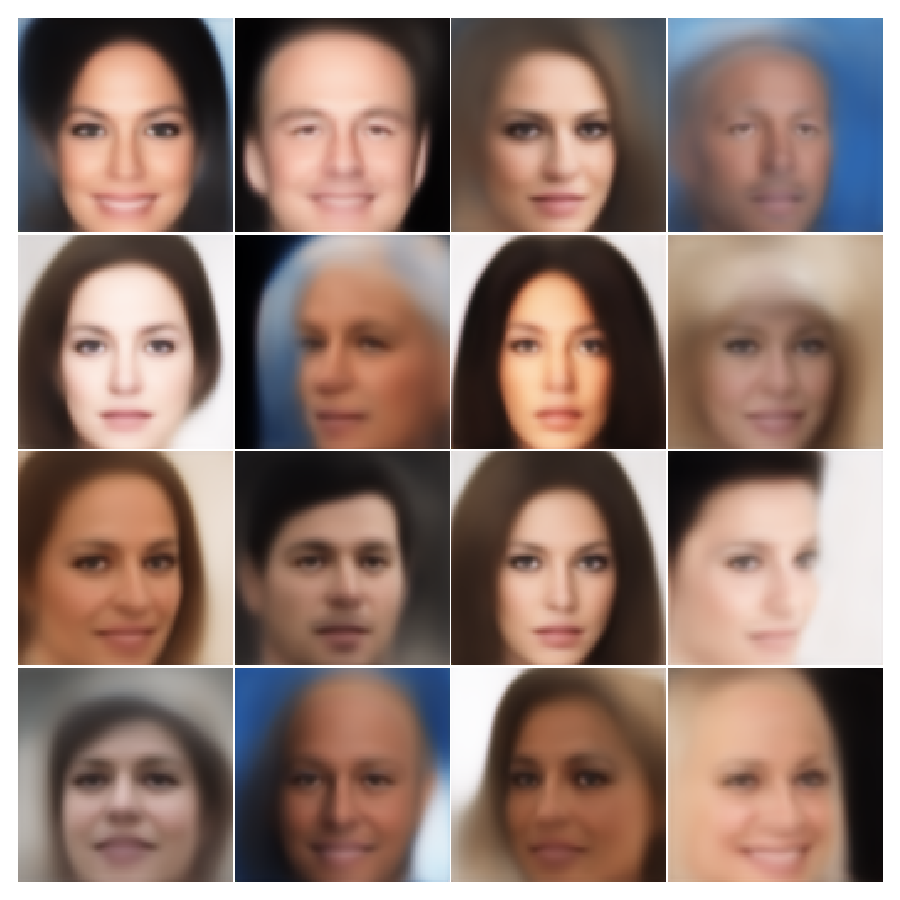

In [80]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


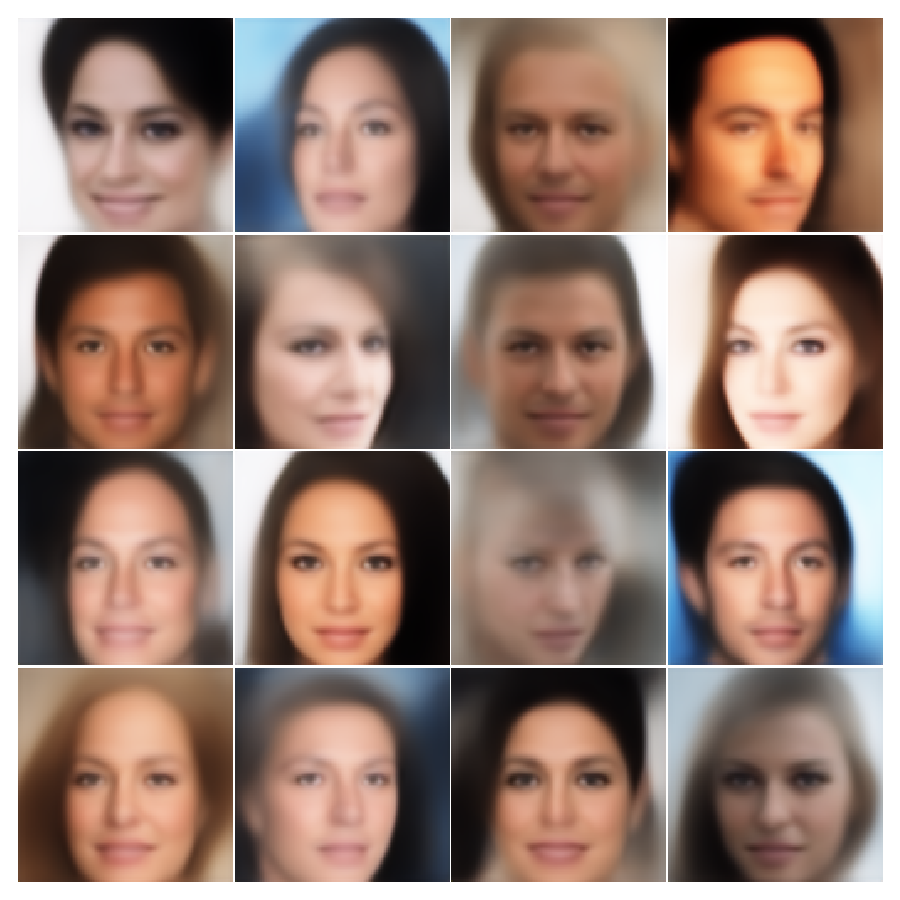

In [71]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


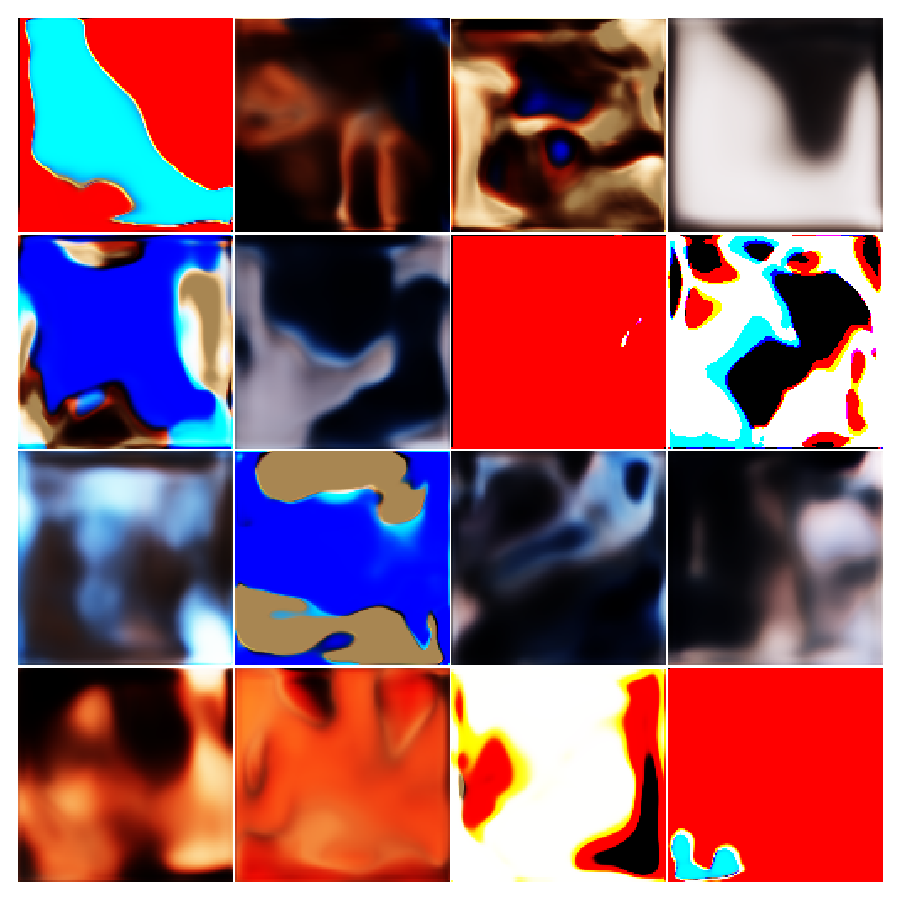

In [79]:
viz['gens'][0].view(scale=2)

In [78]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


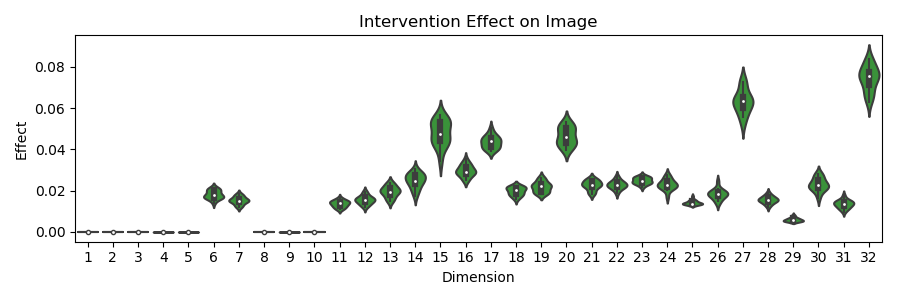

In [73]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


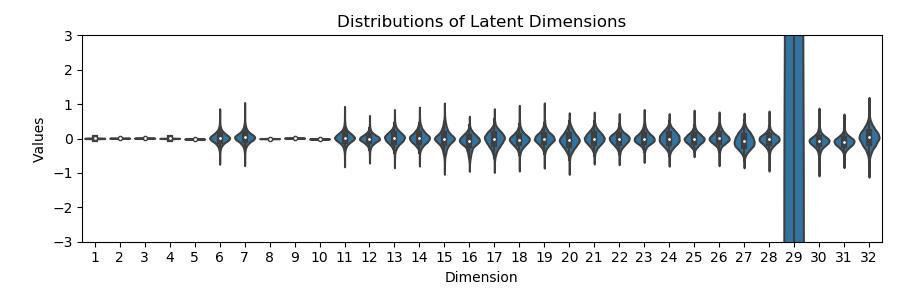

In [82]:
fig = viz['latent'][0].view(scale=2)
plt.figure(fig.number)
ax = fig.get_axes()[0]
ax.set_ylim(-3, 3)
fig

In [69]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-8a572dc4623f>", line 1, in <module>
    evals = run.evaluate(pbar=tqdm)
  File "/is/ei/fleeb/workspace/foundation/foundation/train/analysis.py", line 123, in evaluate
    results[k] = fn(self.state, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/analyze.py", line 680, in _top_fn
    S.fid_gen_stats[gen_type] = compute_inception_stat(generate, inception=inception, pbar=pbar)
  File "/is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py", line 123, in compute_inception_stat
    pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 

KeyboardInterrupt: 

> /is/ei/fleeb/workspace/gh-projects/hybrid/run_fid.py(123)compute_inception_stat()
    121                         pred = adaptive_avg_pool2d(pred, output_size=(1, 1))
    122 
--> 123                 pred_arr[j:j+N] = pred.cpu().numpy().reshape(N, -1)
    124 
    125                 j += N

ipdb> q


In [27]:
update_checkpoint(S, 'evals', overwrite=True)

Updated 1 keys: ['evals']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-wgan_0036-6048638-01_200131-185403/checkpoint_30.pth.tar


In [28]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [29]:
# run.ckpt_path

In [30]:
# run.meta.history

In [31]:
# print(run.state.model)

In [32]:
# S.keys()

In [33]:
# S.hello = 'world'

In [34]:
# update_checkpoint(S, 'hello')

In [35]:
# viz_

In [36]:
# S.fid_gen_stats.keys()

In [37]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [38]:
# import pickle

In [39]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [40]:
# f

In [41]:
# run.state.keys()

In [42]:
# model = run.state.model

In [43]:
# q = run.state.q
# q.shape

In [44]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [45]:
# show_nums(imgs)

In [47]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/gans/'
# run.save(media_root, overwrite=True)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-01_200131-185403_ckpt30
	Model saved
	Config saved
	Visualization saved
	Evaluation saved


'/is/ei/fleeb/workspace/media/hybrid/gans/3dshapes-wgan_0036-6048638-01_200131-185403_ckpt30'